In [3]:
from gensim.models.ldamodel import LdaModel
import gensim
import pandas as pd
import glob
from nltk.corpus import stopwords
import string
from gensim import corpora,models
from gensim.utils import lemmatize # Only keep nums
from gensim.corpora import Dictionary
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
import sys
import numpy as np

C:\Users\mnan\Anaconda3\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\mnan\Anaconda3\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [76]:
def process_text(content_list):
    """
    stopwords
    
    punctuation
    
    digits
    
    english words
    
    """
    typical_words = ['light','therapy','facial','treatment']
    stoplist = stopwords.words('english') + typical_words 
    
    remove_digits = str.maketrans('', '', string.digits)
    remove_punctuation = str.maketrans('', '', string.punctuation)
    
    dict_english = enchant.Dict("en_US")
    
    lemma = WordNetLemmatizer()
    
    
    content_cleaned =[i.translate(remove_digits) for i in content_list]
    
    content_cleaned = [i.translate(remove_punctuation) for i in content_cleaned]
    
    content_cleaned = [[lemma.lemmatize(word.lower()) for word in line.split()
                        if (word.lower() not in stoplist) and dict_english.check(word.lower())==True] for line in content_cleaned]

    return content_cleaned

In [78]:
content = pd.read_csv('text.csv',encoding = 'iso-8859-1',header=None)
content.columns = ['content']
content['content']
print(len(content))
contendf_bowt_list = content['content'].values
cleaned_list = process_text(content_list)
print('after process....')
print(len(cleaned_list))

8001
after process....
8001


In [81]:
len(list(filter(lambda x:x==[],cleaned_list)))

14

In [4]:
#bigram = gensim.models.Phrases(cleaned_list,min_count=1, threshold=2)
#dictionary_text_list = list(bigram[cleaned_list])
#train_text_list = list(bigram[cleaned_list])
#dictionary = Dictionary(dictionary_text_list)
#corpus = [dictionary.doc2bow(text) for text in train_text_list]

In [82]:
dictionary = Dictionary(cleaned_list)
corpus = [dictionary.doc2bow(text) for text in cleaned_list]

In [83]:
num_topics = 10
lda = LdaModel(corpus, num_topics= num_topics,id2word = dictionary)
lda.show_topics(num_topics,15)

[(0,
  '0.027*"violet" + 0.016*"benefit" + 0.015*"skin" + 0.010*"help" + 0.008*"low" + 0.007*"time" + 0.007*"black" + 0.007*"level" + 0.006*"red" + 0.005*"body" + 0.005*"muscle" + 0.005*"one" + 0.005*"mask" + 0.005*"led" + 0.004*"tone"'),
 (1,
  '0.056*"led" + 0.052*"skin" + 0.030*"wrinkle" + 0.026*"acne" + 0.015*"care" + 0.012*"ultrasound" + 0.012*"ultrasonic" + 0.012*"blue" + 0.011*"high" + 0.011*"red" + 0.010*"intensity" + 0.009*"machine" + 0.009*"focused" + 0.009*"collagen" + 0.008*"rt"'),
 (2,
  '0.019*"day" + 0.017*"new" + 0.017*"mask" + 0.014*"device" + 0.013*"rt" + 0.013*"exciting" + 0.013*"complete" + 0.012*"launching" + 0.011*"added" + 0.007*"medical" + 0.007*"led" + 0.007*"pub" + 0.005*"acne" + 0.005*"patient" + 0.005*"health"'),
 (3,
  '0.099*"led" + 0.061*"mask" + 0.056*"skin" + 0.048*"acne" + 0.042*"beauty" + 0.040*"photon" + 0.040*"rejuvenation" + 0.035*"new" + 0.028*"color" + 0.026*"blue" + 0.025*"red" + 0.018*"care" + 0.016*"sun" + 0.014*"face" + 0.012*"healing"'),
 (4

In [85]:
assign = []
for i in range(len(corpus)):
    assign.append(sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][0])
conf_score = []
for i in range(len(corpus)):
    conf_score.append(sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][1])

In [86]:
df_bow = pd.DataFrame({'original_text':content.content.values,
             'corpus':corpus,
            'assign':assign,
            'conf_score':conf_score,
                      'bow':cleaned_list})

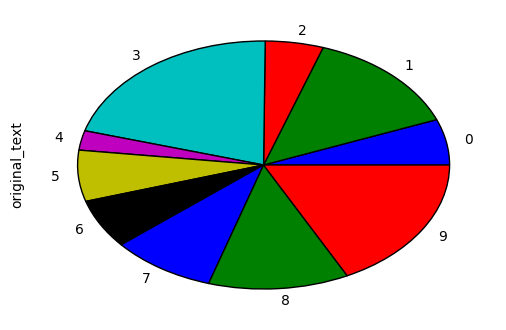

In [87]:
df_bow.groupby('assign').count()['original_text'].plot(kind='pie')

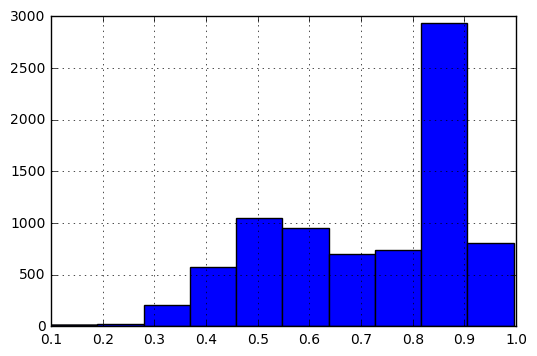

In [88]:
df_bow['conf_score'].hist()

In [69]:
df_bow[df_bow['conf_score']<0.5][['bow','original_text']]

,bow,original_text
11,"[intranasal, infrared, naturally]",$499 VieLight Intranasal Light Therapy 810 Inf...
13,[],RT @Theralight: Why non-LED light therapy is b...
31,"[skincare, issue]",have any #skincare issues? #olivegold03 and li...
41,"[highly, effective, outpatient, condition, inc...",Light therapy is a highly effective outpatient...
48,"[health, color, skincare, clearing]",RT @WXU_DEZ_025: #Health #Acne sherif.ws/acne/...
49,"[control, skincare]",Take control of your #rosacea with an #IPL #Ph...
52,"[electric, massage, photon, vibrating]",2 in 1 Electric LED Therapy Eye Care Massage P...
66,"[added, video, smacker]",I added a video to a @YouTube playlist youtu.b...
69,[],RT @Theralight: LOVE YOUR SKIN! theralightinc....
70,[],10 Tips to Get the Most Out of Light Therapy p...


In [29]:
assign_dict = dict()
for i in range(len(corpus)):
        key = (sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][0])
        assign_dict[key] = assign_dict.get(key, []) + [sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][1]]

In [30]:
count_assign = []
conf_score = []
for key in assign_dict.keys():
    count = assign_dict.get(key, [])
    count_assign.append(len(count))
    conf_score.append(np.mean(count))

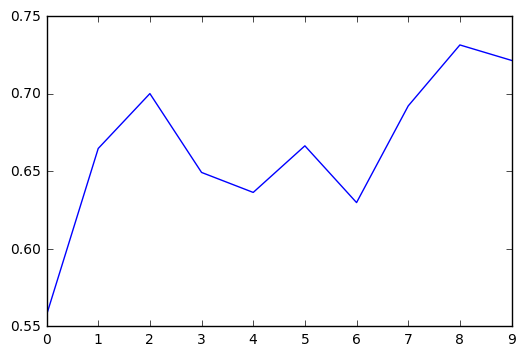

In [31]:
plt.plot(conf_score)

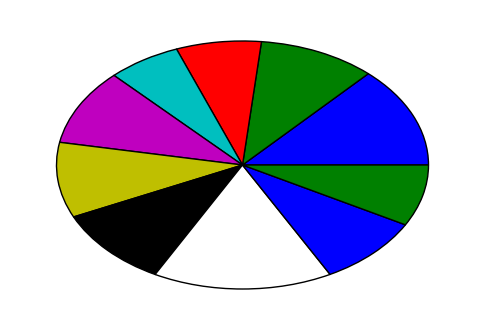

In [20]:
plt.pie(count_assign)
plt.figure(figsize = (5,5))

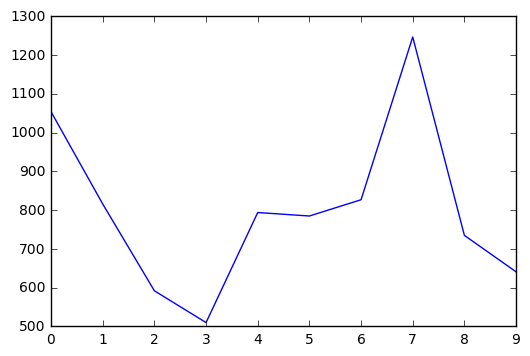

In [11]:
plt.plot(count_assign)

In [12]:
sum(count_assign)

8001

Now we try to use TFIDF

In [24]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
num_topics = 10
lda_tfidf = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
lda.show_topics(num_topics,15)

[(0,
  '0.027*"skincare" + 0.020*"ultrasound" + 0.019*"benefit" + 0.018*"ultrasonic" + 0.017*"vbblogdirectory" + 0.016*"psoriasis" + 0.016*"treat" + 0.016*"violet" + 0.016*"system" + 0.015*"machine" + 0.015*"wrinkle" + 0.015*"suprlykgx" + 0.014*"theralight" + 0.013*"intensity" + 0.013*"condition"'),
 (1,
  '0.023*"skincare" + 0.017*"spot" + 0.012*"revive" + 0.011*"photofacial" + 0.010*"today" + 0.010*"treat" + 0.010*"rosacea" + 0.009*"complexion" + 0.009*"photorejuvenation" + 0.009*"essential" + 0.009*"freckle" + 0.008*"winter" + 0.008*"collagen" + 0.008*"industry" + 0.008*"relief"'),
 (2,
  '0.011*"issue" + 0.008*"larissacenter" + 0.007*"stdosrawcint" + 0.007*"needle" + 0.006*"downtime" + 0.006*"solution" + 0.006*"jerawat" + 0.006*"pictwittercomaojlvutcj" + 0.006*"dengan" + 0.006*"googlpexzmz" + 0.006*"readmore" + 0.006*"hilang" + 0.005*"whyuneedlighttherapy" + 0.005*"olivegold" + 0.005*"frequency"'),
 (3,
  '0.016*"beauty" + 0.014*"cosmetic" + 0.013*"device" + 0.013*"wrinkle" + 0.009

In [115]:
assign_dict = dict()
for i in range(len(corpus_tfidf)):
        key = (sorted(lda_tfidf[corpus_tfidf[i]],key = lambda x:x[1],reverse = True)[0][0])
        assign_dict[key] = assign_dict.get(key, []) + [sorted(lda_tfidf[corpus_tfidf[i]],key = lambda x:x[1],reverse = True)[0][1]]
count_assign = []
conf_score = []
for key in assign_dict.keys():
    count = assign_dict.get(key, [])
    count_assign.append(len(count))
    conf_score.append(np.mean(count))

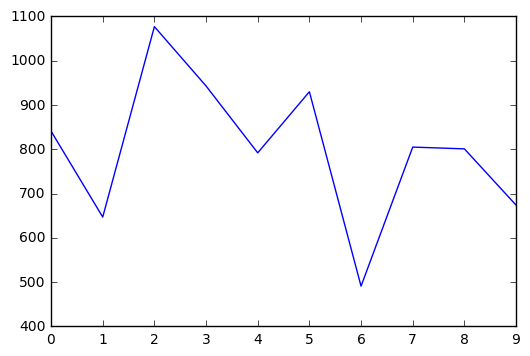

In [116]:
plt.plot(count_assign)

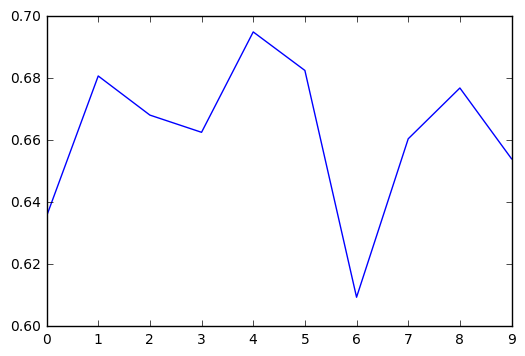

In [117]:
plt.plot(conf_score)

In [6]:
import nltk
import itertools
from collections import Counter
import operator

In [7]:
corpus_with_pos = list(map(lambda x:nltk.pos_tag(x),cleaned_list))

In [8]:
sorted(dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[]))))).items(),key=operator.itemgetter(1),reverse = True)

[('NN', 51755),
 ('JJ', 17202),
 ('VBG', 5201),
 ('VBD', 2693),
 ('RB', 2585),
 ('NNS', 2270),
 ('VBP', 1925),
 ('VBN', 1283),
 ('VB', 1117),
 ('IN', 902),
 ('VBZ', 743),
 ('JJR', 586),
 ('PRP', 413),
 ('JJS', 200),
 ('RBR', 187),
 ('MD', 172),
 ('CD', 158),
 ('FW', 137),
 ('DT', 104),
 ('NNP', 97),
 ('CC', 45),
 ('WRB', 44),
 ('EX', 12),
 ('WP', 11),
 ('RP', 8),
 ('WDT', 7),
 ('RBS', 6),
 ('POS', 5),
 ('WP$', 2),
 ('PRP$', 1)]

C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


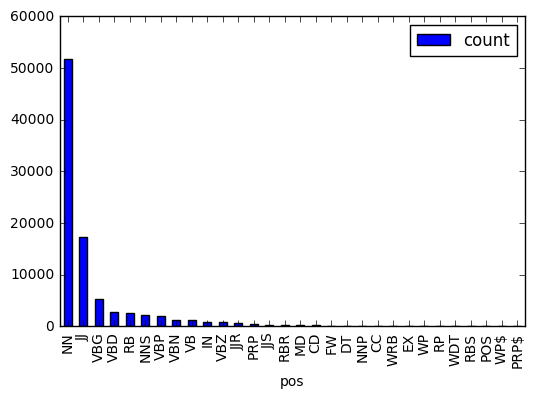

In [9]:
count_pos_dict = dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[])))))
pd.DataFrame({'count':list(count_pos_dict.values()),'pos':list(count_pos_dict.keys())}).set_index('pos').sort('count',ascending=False).plot(kind = 'bar')

In [10]:
#keep_pos = ['JJ','JJS','JJR','NN','NNP','RB','VB','VBP','VBZ','RBR','VBD','VBN']
keep_pos = ['NN','NNP']

In [11]:
list(filter(lambda x: x[0] in keep_pos,dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[]))))).items()))

[('NNP', 97), ('NN', 51755)]

In [12]:
filtered_corpus_with_pos=[]
for i in corpus_with_pos:
    filtered_corpus_with_pos.append(list(filter(lambda x: x[1] in keep_pos,i)))

In [13]:
filtered_corpus_by_pos = []
for i in filtered_corpus_with_pos:
    filtered_corpus_by_pos.append(list(map(lambda x: x[0],i)))

In [14]:
dictionary_pos = Dictionary(filtered_corpus_by_pos)
corpus_pos = [dictionary_pos.doc2bow(text) for text in filtered_corpus_by_pos]

In [15]:
tfidf_by_pos = models.TfidfModel(corpus_pos)
corpus_by_pos_tfidf = tfidf_by_pos[corpus_pos]
num_topics = 10
lda_pos_tfidf = LdaModel(corpus_by_pos_tfidf, id2word=dictionary_pos, num_topics=num_topics)
lda_pos_tfidf.show_topics(num_topics,5)

[(0,
  '0.014*"realize" + 0.012*"remedy" + 0.011*"theralightinccomlighttherapy" + 0.011*"rosacea" + 0.009*"wrinkle"'),
 (1,
  '0.012*"theralight" + 0.012*"theralightinccomhowtocontrol" + 0.011*"inflammation" + 0.011*"fight" + 0.011*"problem"'),
 (2,
  '0.022*"maskyoself" + 0.014*"pictwittercomrzbbblv" + 0.011*"pictwittercomifokyuhjw" + 0.008*"salon" + 0.008*"nutrition"'),
 (3,
  '0.025*"rejuvenation" + 0.021*"photon" + 0.020*"color" + 0.019*"beauty" + 0.011*"owlyzpmdw"'),
 (4,
  '0.151*"brighten" + 0.149*"environment" + 0.140*"panel" + 0.138*"winter" + 0.127*"energy"'),
 (5,
  '0.011*"pictwittercomfzhkqbcyu" + 0.010*"quality" + 0.010*"system" + 0.008*"beauty" + 0.008*"menggabungkan"'),
 (6,
  '0.015*"photo" + 0.015*"thank" + 0.015*"goodness" + 0.014*"pictwittercomrxmlgmur" + 0.011*"bluemd"'),
 (7,
  '0.009*"cell" + 0.009*"theralightinccomredlighttrea" + 0.009*"wavelength" + 0.009*"create" + 0.009*"layer"'),
 (8,
  '0.043*"theralightinccomlighttherapy" + 0.039*"rosacea" + 0.027*"vbblogd

In [16]:
num_topics = 10
lda_pos = LdaModel(corpus_pos, id2word=dictionary_pos, num_topics=num_topics)
lda_pos.show_topics(num_topics,10)

[(0,
  '0.030*"spot" + 0.021*"treat" + 0.017*"photorejuvenation" + 0.014*"rosacea" + 0.014*"doxycycline" + 0.013*"video" + 0.010*"watch" + 0.010*"dermatology" + 0.009*"phototherapy" + 0.009*"medspa"'),
 (1,
  '0.136*"energy" + 0.135*"technology" + 0.135*"winter" + 0.135*"panel" + 0.135*"environment" + 0.135*"brighten" + 0.011*"photon" + 0.010*"beauty" + 0.009*"rejuvenation" + 0.007*"color"'),
 (2,
  '0.030*"beauty" + 0.029*"skincare" + 0.020*"device" + 0.017*"complexion" + 0.016*"oliviaholt" + 0.015*"treatin" + 0.013*"step" + 0.012*"intensity" + 0.012*"revivelight" + 0.012*"kathyireland"'),
 (3,
  '0.062*"skincare" + 0.050*"vbblogdirectory" + 0.035*"rosacea" + 0.035*"benefit" + 0.032*"theralightinccomlighttherapy" + 0.026*"violet" + 0.024*"theralight" + 0.024*"suprlykgx" + 0.018*"issue" + 0.015*"today"'),
 (4,
  '0.022*"maskyoself" + 0.022*"skincare" + 0.019*"system" + 0.013*"pictwittercomjgyecog" + 0.013*"solution" + 0.012*"pictwittercomrzbbblv" + 0.012*"microdermabrasion" + 0.010*"re